In [1]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('E:/Data Science/Intro to Data Analysis/1/enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [2]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

engagement_filename = 'E:/Data Science/Intro to Data Analysis/1/daily_engagement.csv'
submissions_filename = 'E:/Data Science/Intro to Data Analysis/1/project_submissions.csv'

with open(engagement_filename, 'rb') as f:
    daily_engagement = list(unicodecsv.DictReader(f))
    
with open(submissions_filename, 'rb') as f:
    project_submissions = list(unicodecsv.DictReader(f))
    
print daily_engagement[0], "\n"

print project_submissions[0]

{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'} 

{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


# Fixing Data Types

In [3]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [4]:
#Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [5]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

# Investigating the Data

In [6]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

# enrollments
enrollment_num_rows = len(enrollments)
enrollment_set = {enrollment['account_key'] for enrollment in enrollments}
enrollment_num_unique_students = len(enrollment_set)
print "enrollment:", enrollment_num_rows, enrollment_num_unique_students, "\n"

# daily_engagement
engagement_num_rows = len(daily_engagement)
engagement_set = {engagement['acct'] for engagement in daily_engagement}
engagement_num_unique_students = len(engagement_set)
print "engagement:", engagement_num_rows, engagement_num_unique_students, "\n"

# project_submissions
submission_num_rows = len(project_submissions)
submission_set = {submission['account_key'] for submission in project_submissions}
submission_num_unique_students = len(submission_set)
print "submissions:", submission_num_rows, submission_num_unique_students, "\n"

enrollment: 1640 1302 

engagement: 136240 1237 

submissions: 3642 743 



# Problems in the Data

In [7]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
for engagement in daily_engagement:
    engagement['account_key'] = engagement.pop('acct')
    
daily_engagement[0]['account_key']

u'0'

# Missing Engagement Records

In [8]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
for enrolled in enrollments:
    if enrolled['account_key'] not in engagement_set:
        print enrolled
        break

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


# Checking for More Problem Records

In [9]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
surprises = 0
for enrolled in enrollments:
    if enrolled['account_key'] not in engagement_set and enrolled['days_to_cancel'] != 0:
        surprises += 1
        print enrolled, "\n"
        
print surprises

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59} 

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99} 

{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None} 

3


# Tracking Down the Remaining Problems

In [10]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [11]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [12]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


# Refining the Question

In [13]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}

for enrollment in enrollments:
    if (not enrollment['cancel_date'] or enrollment['days_to_cancel'] > 7) and not enrollment['is_udacity']:
        if (enrollment['account_key'] not in paid_students or enrollment['join_date'] > paid_students[enrollment['account_key']]):
            paid_students[enrollment['account_key']] = enrollment['join_date']
        
print len(paid_students)

995


# Getting Data from First Week

In [14]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return (0 <= time_delta.days < 7)

In [15]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = []

for x in daily_engagement:
    if x['account_key'] in paid_students.keys():
        if 0 <= (x['utc_date']-paid_students[x['account_key']]).days < 7:
            paid_engagement_in_first_week.append(x)
            
print len(paid_engagement_in_first_week)

6919


In [16]:
## From the instructor
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return (0 <= time_delta.days < 7)

def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print len(paid_enrollments)
print len(paid_engagement)
print len(paid_submissions)

paid_engagement_in_first_week = []
for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']

    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)

len(paid_engagement_in_first_week)

1293
134549
3618


6919

# Exploring Student Engagement

In [17]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [18]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [19]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


# What variables do I have???

In [20]:
# WHAT VARIABLES DO I HAVE???
#print "engagement_by_account: ", engagement_by_account.items()[0][1][0]
print "LISTS", "\n"
print "daily_engagement = list of dicts with keys: ", "\n    ", daily_engagement[0].keys(), "\n"
print "enrollments = list of dicts with keys: ", "\n    ", enrollments[0].keys(), "\n"
print "non_udacity_engagement = list of dicts with keys: ", "\n    ", non_udacity_engagement[0].keys(), "\n"
print "non_udacity_enrollments = list of dicts with keys: ", "\n    ", non_udacity_enrollments[0].keys(), "\n"
print "non_udacity_submissions = list of dicts with keys: ", "\n    ", non_udacity_submissions[0].keys(), "\n"
print "paid_engagement_in_first_week = list of dicts with keys: ", "\n    ", paid_engagement_in_first_week[0].keys(), "\n"
print "project_submissions = list of dicts with keys: ", "\n    ", project_submissions[0].keys(), "\n"
print "paid_submissions = list of dicts with keys: ", "\n    ", paid_submissions[0].keys(), "\n"
print "paid_enrollments = list of dicts with keys: ", "\n    ", paid_enrollments[0].keys(), "\n"
print "paid_engagement = list of dicts with keys: ", "\n    ", paid_engagement[0].keys(), "\n\n\n"

print "DICTS", "\n"
print "engagement_by_account = dict with 'user_account's as keys and a list of all engagement data for the first week (from 'paid_engagement_in_first_week') as the associated values.", "\n"
print "paid_students = dict containing all students who either haven't canceled yet or who remained enrolled for more than 7 days. The keys are 'account_key's and the values are the date the sudent enrolled. ", "\n"
print "total_minutes_by_account = dict with the total minutes each student spent in the classroom during the first week.  The keys are 'account_key's and the values are the total minutes.", "\n\n\n"
# The keys are account keys, and the values are numbers (total minutes)", "\n", total_minutes_by_account.items()[0]

print "SETS", "\n"
print "engagement_set = the unique 'account_key's in daily_engagement", "\n"
print "enrollment_set = the unique 'account_key's in enrollments", "\n"
print "submission_set = the unique 'account_key's in project_submissions", "\n"
print "udacity_test_accounts = a set of the account keys for all Udacity test accounts", "\n"

LISTS 

daily_engagement = list of dicts with keys:  
     [u'lessons_completed', u'num_courses_visited', u'total_minutes_visited', u'projects_completed', 'account_key', u'utc_date'] 

enrollments = list of dicts with keys:  
     [u'status', u'is_udacity', u'is_canceled', u'join_date', u'account_key', u'cancel_date', u'days_to_cancel'] 

non_udacity_engagement = list of dicts with keys:  
     [u'lessons_completed', u'num_courses_visited', u'total_minutes_visited', u'projects_completed', 'account_key', u'utc_date'] 

non_udacity_enrollments = list of dicts with keys:  
     [u'status', u'is_udacity', u'is_canceled', u'join_date', u'account_key', u'cancel_date', u'days_to_cancel'] 

non_udacity_submissions = list of dicts with keys:  
     [u'lesson_key', u'processing_state', u'account_key', u'assigned_rating', u'completion_date', u'creation_date'] 

paid_engagement_in_first_week = list of dicts with keys:  
     [u'lessons_completed', u'num_courses_visited', u'total_minutes_visited', 

# Debugging Data Analysis Code

In [21]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

for key, val in total_minutes_by_account.items():
    if val < 0 or val > 60*24*7:
        print "\n", engagement_by_account[key][0]['account_key']
        for x in engagement_by_account[key]:
            print "  ", x['total_minutes_visited']

# Lessons Completed in First Week

In [22]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

def total_by_account(key, data):
    '''A function to compute the total of <key> for each user'''
    totals = {}
    for account_key, records in data.items():
        total = 0
        for record in records:
            total += record[key]
        totals[account_key] = total
    return totals

lessons_by_account = total_by_account('lessons_completed', engagement_by_account)

# Summarize the data about minutes spent in the classroom
print 'Mean:', np.mean(lessons_by_account.values())
print 'Standard deviation:', np.std(lessons_by_account.values())
print 'Minimum:', np.min(lessons_by_account.values())
print 'Maximum:', np.max(lessons_by_account.values())

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


In [23]:
## From the instructor
from collections import defaultdict
import numpy as np

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week,'account_key')

def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)
    
total_minutes_by_account = sum_grouped_items(engagement_by_account,'total_minutes_visited')
describe_data(total_minutes_by_account.values())
print "\n"

lessons_completed_by_account = sum_grouped_items(engagement_by_account,'lessons_completed')
describe_data(lessons_completed_by_account.values())

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


# Number of Visits in First Week

In [24]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

# add a 'has_visited' key to engagement_by_account
for account_key, engagement_records in engagement_by_account.items():
    for engagement_record in engagement_records:
            engagement_record['has_visited'] = int(engagement_record['num_courses_visited'] > 0)
            
days_by_account = total_by_account('has_visited', engagement_by_account)

# Summarize the data about minutes spent in the classroom
print 'Mean:', np.mean(days_by_account.values())
print 'Standard deviation:', np.std(days_by_account.values())
print 'Minimum:', np.min(days_by_account.values())
print 'Maximum:', np.max(days_by_account.values())

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


# Splitting out Passing Students

In [25]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']
ratings = ['DISTINCTION', 'PASSED']

# paid_submissions
passed = set()
for x in paid_submissions:
    if x['lesson_key'] in subway_project_lesson_keys and x['assigned_rating'] in ratings:
        passed.add(x['account_key'])
#for x in paid_engagement_in_first_week:
#    if x['lesson_key'] in subway_project_lesson_keys and x['assigned_rating'] in ratings:
#        passed.add(x['account_key'])

passing_engagement = [x for x in paid_engagement_in_first_week if x['account_key'] in passed]
non_passing_engagement = [x for x in paid_engagement_in_first_week if x['account_key'] not in passed]

print len(passing_engagement)
print len(non_passing_engagement)

4527
2392


# Comparing the Two Student Groups

In [26]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

minutes1 = sum_grouped_items(group_data(passing_engagement,'account_key'),'total_minutes_visited').values()
minutes2 = sum_grouped_items(group_data(non_passing_engagement,'account_key'),'total_minutes_visited').values()

lessons1 = sum_grouped_items(group_data(passing_engagement,'account_key'),'lessons_completed').values()
lessons2 = sum_grouped_items(group_data(non_passing_engagement,'account_key'),'lessons_completed').values()

days1 = [val for key, val in days_by_account.items() if key in passed]
days2 = [val for key, val in days_by_account.items() if key not in passed]

# Making Histograms

(array([ 272.,   34.,   17.,    9.,    6.,    2.,    1.,    5.,    0.,    2.]),
 array([    0.        ,   176.85227493,   353.70454987,   530.5568248 ,
          707.40909973,   884.26137467,  1061.1136496 ,  1237.96592453,
         1414.81819947,  1591.6704744 ,  1768.52274933]),
 <a list of 10 Patch objects>)

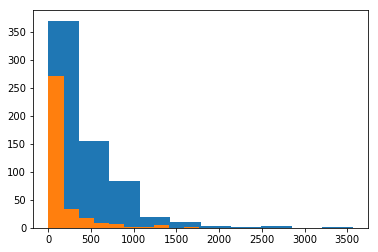

In [27]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(minutes1)
plt.hist(minutes2)

(array([ 317.,   17.,    6.,    4.,    1.,    1.,    0.,    1.,    0.,    1.]),
 array([  0. ,   2.7,   5.4,   8.1,  10.8,  13.5,  16.2,  18.9,  21.6,
         24.3,  27. ]),
 <a list of 10 Patch objects>)

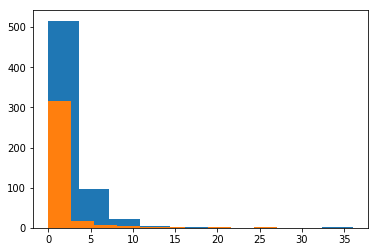

In [28]:
%matplotlib inline
plt.hist(lessons1)
plt.hist(lessons2)

(array([ 97.,  90.,  56.,   0.,  41.,  15.,   0.,  24.,  17.,   8.]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 10 Patch objects>)

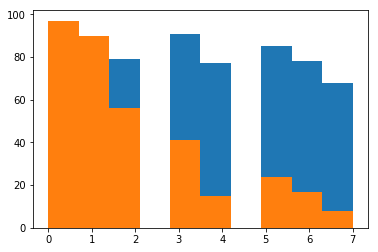

In [29]:
%matplotlib inline
plt.hist(days1)
plt.hist(days2)

# Improving Plots and Sharing Findings

Text(0.5,0,u'Days')

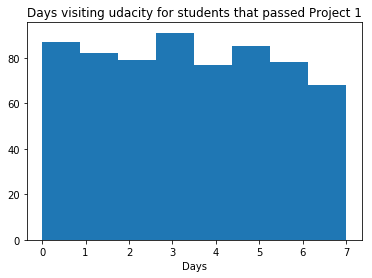

In [30]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

import seaborn as sns
%matplotlib inline
plt.hist(days1, bins=8)
plt.title("Days visiting udacity for students that passed Project 1")
plt.xlabel("Days")